# Machine learning intro

Polynomial regression using scikit-learn.

In [0]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import sklearn.metrics

# Reproducible results
np.random.seed(42)

In [0]:
# Generate synthetic dataset
n = 100
beta_true = [0.1, 0.3142, 0.0618, -0.2718]


def f(x, noise_std=0.0):
  """Creates a degree three polynomial from the input.
  """
  y = beta_true[0] \
      + beta_true[1] * x \
      + beta_true[2] * x**2 \
      + beta_true[3] * x**3
  y += noise_std * np.random.randn(n, 1)
  return y


X = np.random.rand(n, 1) * 20 - 10
y = f(X, noise_std=20.0)

X_val = np.random.rand(n, 1) * 20 - 10
y_val = f(X_val, noise_std=20.0)

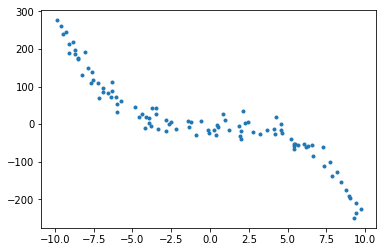

In [87]:
plt.figure()
_ = plt.plot(X, y, '.')

In [0]:
# Transform dataset using a polynomial of degree 3
# It will fit an intercept (the bias), and first through third order terms
poly = PolynomialFeatures(degree=3, include_bias=True)
poly.fit(X)
X_ = poly.transform(X)
X_val_ = poly.transform(X_val)

In [0]:
# Create model and fit it to the data
model = linear_model.LinearRegression(fit_intercept=True)
_ = model.fit(X_, y)

In [90]:
# Use model to predict outputs
yhat = model.predict(X_)
yhat_val = model.predict(X_val_)
mse = sklearn.metrics.mean_squared_error(y, yhat)
mse_val = sklearn.metrics.mean_squared_error(y_val, yhat_val)
print(f"Training data error  : {mse}")
print(f"Validation data error: {mse_val}")

Training data error  : 308.98603155350884
Validation data error: 338.06144807128265


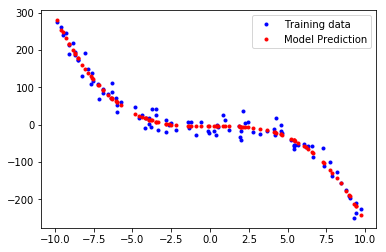

In [91]:
# Plot predictions
plt.figure()
plt.plot(X, y, '.', color="blue")
plt.plot(X, yhat, '.', color="red")
_ = plt.legend(["Training data", "Model Prediction"])

In [92]:
# Regression coefficients
print(f"True coefficients : {beta_true}")
print(f"Model coefficients: {model.coef_[0].round(4).tolist()}")

True coefficients : [0.1, 0.3142, 0.0618, -0.2718]
Model coefficients: [0.0, 0.4684, 0.1753, -0.281]
